In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x = data[['Annual Income (k$)','Spending Score (1-100)']].values

In [4]:
import scipy.cluster.hierarchy as sch 

In [5]:
plt.rcParams['figure.figsize'] = (8,4)

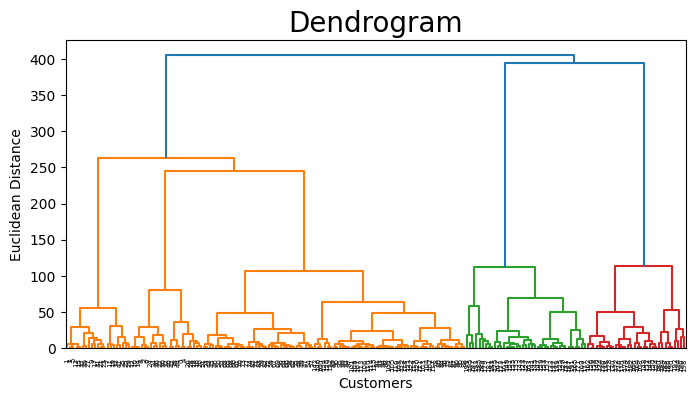

In [6]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward')) # agglomerative - to calc distance between 2 cluster
plt.title('Dendrogram',fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
hc = AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',
    linkage='ward'
)

y_hc = hc.fit_predict(x)

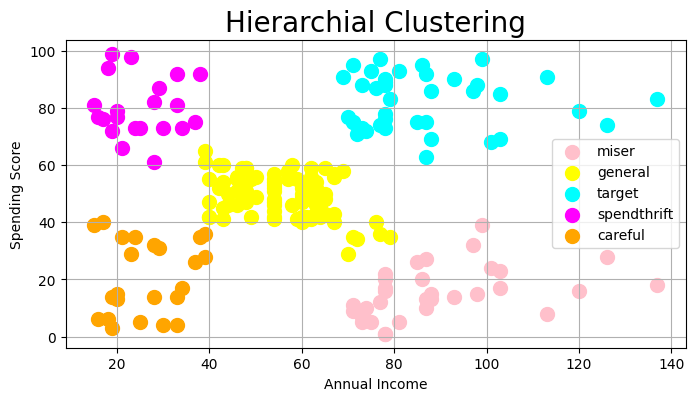

In [9]:
plt.scatter(x[y_hc == 0,0],x[y_hc == 0,1], s = 100, c = 'pink', label='miser')
plt.scatter(x[y_hc == 1,0],x[y_hc == 1,1], s = 100, c = 'yellow', label='general')
plt.scatter(x[y_hc == 2,0],x[y_hc == 2,1], s = 100, c = 'cyan', label='target')
plt.scatter(x[y_hc == 3,0],x[y_hc == 3,1], s = 100, c = 'magenta', label='spendthrift')
plt.scatter(x[y_hc == 4,0],x[y_hc == 4,1], s = 100, c = 'orange', label='careful')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (15,5)
plt.title('Hierarchial Clustering',fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [10]:
# choose minpts = 2 * dim 

In [11]:
minpts = 2 * x.shape[1]

In [12]:
# calc distance from each point to its closest neighor using the nearest neighors
# point itself is included in n_neighbors
# kneighbors method returns two arrays
# one which contains the distance to the closest _n_neighbors points and 
# the other which contains the index for each of those points


In [13]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

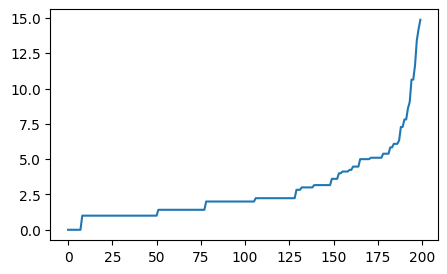

In [14]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances)
plt.show()

In [15]:
# epsilon at maximum curvature

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
dbscan = DBSCAN(eps=8,min_samples=4)
clusters = dbscan.fit_predict(x)

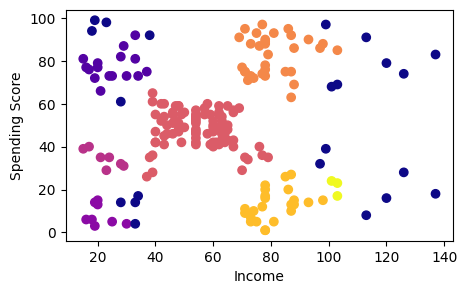

In [18]:
plt.scatter(x[:,0],x[:,1],c=clusters,cmap="plasma")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()